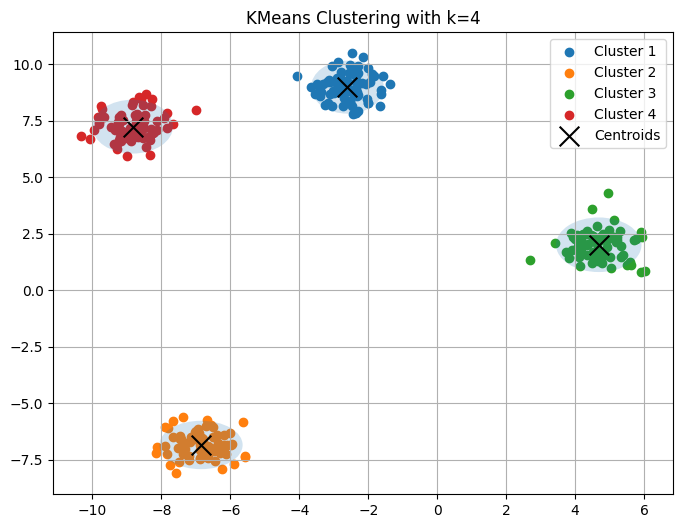

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

# Generate dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Function: Fit and visualize KMeans with cluster highlighting
def plot_kmeans_clusters(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = X[y_kmeans == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

        # Bubble around the cluster
        center = kmeans.cluster_centers_[i]
        std = cluster_points.std(axis=0)
        ellipse = Ellipse(xy=center, width=std[0]*4, height=std[1]*4, alpha=0.2)
        plt.gca().add_patch(ellipse)

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroids')
    plt.title(f'KMeans Clustering with k={k}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_kmeans_clusters(X, k=4)

**Lecture Slides: Clustering & Anomaly Detection**

# **Jupyter Exercise: K-Means and Elbow Method**

### **Instructions:**
1. Load a synthetic dataset using `make_blobs`.
2. Implement your own `kmeans()` function.
3. Implement the `elbow()` function to determine the optimal number of clusters.
4. The code will contain **missing lines** for students to complete.
5. Include visualizations for both clusters and WCSS.



In [ ]:
### **Exercise Template:**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)


### **Detailed Instructions for Students:**
- Complete the `fit` method: use Euclidean distance and `np.argmin()` to assign points.
- In `predict()`, compute distances and return cluster indices.
- Visualize clusters using `plt.scatter` and centroids.

---



In [ ]:
# Step 1: KMeans implementation
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Step 2: Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for i in range(self.max_iters):
            # Step 3: Assign clusters
            distances = ...  # TODO: Compute distance of each point to each centroid
            self.labels = ...  # TODO: Assign each point to the nearest centroid

            # Step 4: Recompute centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = ...  # TODO: Compute distances again
        return ...  # TODO: Return nearest centroid index


Dataset: Use a classification dataset from Kaggle (e.g., Credit Card Fraud Detection https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset)
### **Instructions:**
1. Load the dataset and examine class imbalance.
2. Perform anomaly detection using:
   - IQR: Use boxplots and IQR rules to remove outliers.
   - LOF: Use `sklearn.neighbors.LocalOutlierFactor`
   - Isolation Forest: Use `sklearn.ensemble.IsolationForest`
3. Compare performance of classifiers (e.g., logistic regression, random forest):
   - Without anomaly detection
   - With anomaly detection (cleaned dataset)

### **Tasks:**
- Evaluate models using precision, recall, and F1-score.
- Discuss whether removing anomalies **improves prediction**.
- Visualize decision boundaries with and without anomaly filtering.

---

**End of Lecture**
